In [1]:
from google.colab import drive 

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd

In [11]:
Data = pd.read_excel(r'/content/gdrive/My Drive/SalesSurvey2021-2022_Data.xlsx')

In [12]:
display(pd.DataFrame(Data))

,ResponseID,EndDate,Policynumber,UserID,RatedState,SatAgent,SATFlag,CovgUnderstand,LOB,SOBCode,...,BundlePath,CESResponse,CES,Spanish,RTD_DRVR_AG_NB,RTNG_MRTL_STS_CD,RTNG_GNDR_CD,HERE_INTERVAL_1,HERE_INTERVAL_2,HERE_INTERVAL_3
0,R_2Yt7JuAZhlHlSVa,2021-10-01 00:00:11,6081982818,SAPINB,UT,1.0,1,NaN,Auto,ONLINE,...,NaN,NaN,NaN,0.0,35,S,M,1,1,1
1,R_1CCje1G7UcdzL8W,2021-10-01 00:00:48,6081980481,U95Q4F,GA,2.0,0,NaN,GFR,PHONE,...,NaN,NaN,NaN,0.0,46,D,F,1,1,1
2,R_2tEAieOyFaoWQby,2021-10-01 00:02:51,6081975085,U713VY,FL,1.0,1,1.0,Auto,PHONE,...,NaN,NaN,NaN,0.0,44,S,M,1,1,1
3,R_2PC4l4hBX2Gzk9Z,2021-10-01 00:05:52,6082034460,U951EP,UT,1.0,1,1.0,GFR,PHONE,...,NaN,NaN,2.0,0.0,42,M,F,1,1,1
4,R_22ExdsehQovLj7Z,2021-10-01 00:07:43,6082040228,SAPINB,GA,2.0,0,1.0,Auto,ONLINE,...,NaN,NaN,NaN,0.0,36,S,F,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135171,R_sAoayy5Xap9dSr7,2022-03-31 23:50:39,6101750054,U82RQO,FL,1.0,1,1.0,Auto,PHONE,...,NaN,NaN,1.0,0.0,30,S,F,1,999,999
135172,R_UyDDWJXMmKenE3L,2022-03-31 23:51:52,6101720172,U82DWX,FL,1.0,1,2.0,Auto,PHONE,...,NaN,NaN,2.0,1.0,60,W,F,1,999,999
135173,R_CghjwgxDHtx5Z85,2022-03-31 23:52:12,6101824792,U626F3,NC,1.0,1,1.0,Auto,PHONE,...,NaN,NaN,2.0,0.0,18,S,F,1,999,999
135174,R_wZQLo3t4iOLA5KF,2022-03-31 23:54:58,6101829494,U74F7P,AZ,1.0,1,1.0,Auto,PHONE,...,NaN,NaN,2.0,0.0,20,S,F,1,999,999


In [13]:
from sklearn.cluster import KMeans

import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [15]:
len(Data) #There's 134,176 rows in this data set

135176

## Cleaning, Binning & Relabelling the Data 

**Note:** I did not have to remove outliers because every single survey response is important for the analysis. 

In [ ]:
Data.isnull().sum() #Having Nulls in the survey questions proper makes sense. I will only remove the Nulls in Spanish and Marital Status rows 

In [17]:
Data.dropna(subset=["Spanish"], inplace = True)

In [18]:
Data.dropna(subset=["RTNG_MRTL_STS_CD"], inplace = True)

In [19]:
Data.isnull().sum() #No More Nulls in the columns I care about 

ResponseID                 0
EndDate                    0
Policynumber               0
UserID                     0
RatedState                 0
SatAgent               14115
SATFlag                    0
CovgUnderstand         41605
LOB                        0
SOBCode                    0
SOB                        0
SOBStart                   9
EmbedFirstQuestion         0
Knowledgeable          73328
Helpful                73565
Communication          73215
BestInterest           73194
Patient                73464
BundlePath            135168
CESResponse           121053
CES                    69108
Spanish                    0
RTD_DRVR_AG_NB             0
RTNG_MRTL_STS_CD           0
RTNG_GNDR_CD               0
HERE_INTERVAL_1            0
HERE_INTERVAL_2            0
HERE_INTERVAL_3            0
dtype: int64

In [ ]:
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm

In [23]:
Data.drop(columns = "BundlePath", inplace = True) #Dropping the BundlePath Column. It is not necessary for analysis

In [26]:
bins = [0, 20, 30, 40, 50, 60, 70, 80]   #Created a new column binning the Age data 
bin_labels = ["20 Under", "21-30", "31-40", "41-50", "51-60", "61-70", "71+"]
Data["Age"] = pd.cut(Data["RTD_DRVR_AG_NB"], bins, labels = bin_labels)

In [41]:
Data["RTNG_GNDR_CD"].replace(["M", "F"], ["Man", "Woman"], inplace = True) #Relabeling Gender for easier readability 

In [42]:
Data["RTNG_MRTL_STS_CD"].replace(["S", "M", "D"], ["Single", "Married", "Divorced"], inplace = True) #Relabeling Marital Status for easier readability 

In [43]:
Data.head() #All the Changes I wanted are present now

,ResponseID,EndDate,Policynumber,UserID,RatedState,SatAgent,SATFlag,CovgUnderstand,LOB,SOBCode,...,CESResponse,CES,Spanish,RTD_DRVR_AG_NB,RTNG_MRTL_STS_CD,RTNG_GNDR_CD,HERE_INTERVAL_1,HERE_INTERVAL_2,HERE_INTERVAL_3,Age
0,R_2Yt7JuAZhlHlSVa,2021-10-01 00:00:11,6081982818,SAPINB,UT,1.0,1,NaN,Auto,ONLINE,...,NaN,NaN,0.0,35,Single,Man,1,1,1,31-40
1,R_1CCje1G7UcdzL8W,2021-10-01 00:00:48,6081980481,U95Q4F,GA,2.0,0,NaN,GFR,PHONE,...,NaN,NaN,0.0,46,Divorced,Woman,1,1,1,41-50
2,R_2tEAieOyFaoWQby,2021-10-01 00:02:51,6081975085,U713VY,FL,1.0,1,1.0,Auto,PHONE,...,NaN,NaN,0.0,44,Single,Man,1,1,1,41-50
3,R_2PC4l4hBX2Gzk9Z,2021-10-01 00:05:52,6082034460,U951EP,UT,1.0,1,1.0,GFR,PHONE,...,NaN,2.0,0.0,42,Married,Woman,1,1,1,41-50
4,R_22ExdsehQovLj7Z,2021-10-01 00:07:43,6082040228,SAPINB,GA,2.0,0,1.0,Auto,ONLINE,...,NaN,NaN,0.0,36,Single,Woman,1,1,1,31-40


## Data Exploration

In [30]:
Data["RTNG_GNDR_CD"].value_counts()

Man      75040
Woman    60090
X           38
Name: RTNG_GNDR_CD, dtype: int64

In [31]:
pd.crosstab(Data["RTNG_GNDR_CD"], Data["Spanish"]) 

Spanish,0.0,1.0
RTNG_GNDR_CD,,
Man,72641,2399
Woman,58667,1423
X,38,0


In [36]:
pd.crosstab(Data["SatAgent"], Data["Spanish"], margins=False, normalize= True)

Spanish,0.0,1.0
SatAgent,,
1.0,0.696472,0.024981
2.0,0.171842,0.004568
3.0,0.056785,0.001264
4.0,0.021767,0.000553
5.0,0.021561,0.000207


In [37]:
pd.crosstab(Data["SatAgent"], Data["LOB"])

LOB,Auto,Cycle,GFR
SatAgent,,,
1.0,55094,5292,26948
2.0,13942,1190,6223
3.0,4749,406,1872
4.0,1931,129,642
5.0,1971,115,549


In [38]:
pd.crosstab(Data["SatAgent"], Data["SOBCode"])

SOBCode,ONLINE,PHONE
SatAgent,,
1.0,14295,73039
2.0,5007,16348
3.0,1860,5167
4.0,851,1851
5.0,751,1884


In [44]:
Data["HERE_INTERVAL_1"].groupby(Data["Age"]).mean() #This is an retention measure after 30 days, by age group 

Age
20 Under    0.937054
21-30       0.953434
31-40       0.956504
41-50       0.958432
51-60       0.954023
61-70       0.941170
71+         0.931058
Name: HERE_INTERVAL_1, dtype: float64

## Graphs

In [47]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

1.0    87334
2.0    21355
3.0     7027
4.0     2702
5.0     2635
Name: SatAgent, dtype: int64


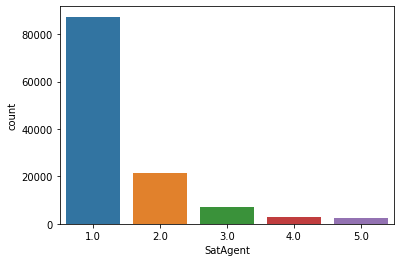

In [48]:
print(Data["SatAgent"].value_counts())

sns.countplot(data = Data, x = "SatAgent")

1.0    43918
2.0    18446
3.0     2222
6.0      601
4.0      504
5.0      369
Name: CES, dtype: int64


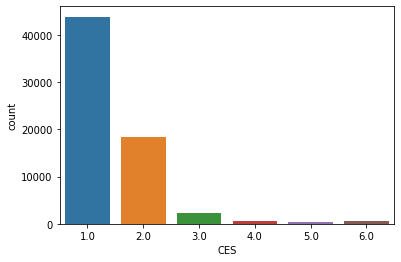

In [49]:
print(Data["CES"].value_counts())

sns.countplot(data = Data, x = "CES")

31-40       26738
21-30       25448
41-50       24803
51-60       24099
61-70       19072
71+          8703
20 Under     4067
Name: Age, dtype: int64


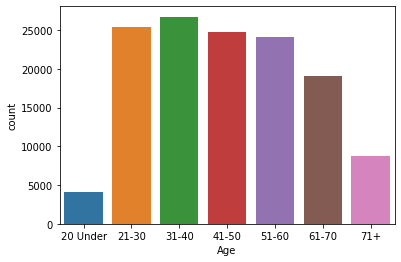

In [50]:
print(Data["Age"].value_counts())

sns.countplot(data = Data, x = "Age")

Text(0.5, 1.0, 'SAT by Line of Business')

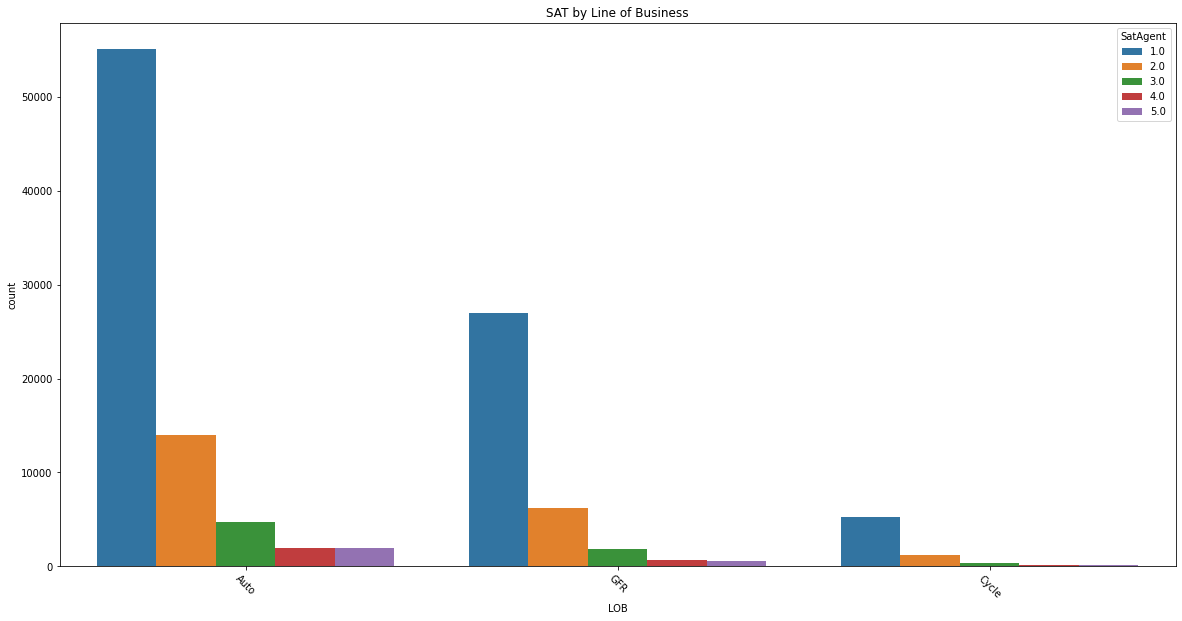

In [51]:
plt.figure(figsize=(20,10))

sns.countplot(data = Data, x = "LOB", hue = "SatAgent")

plt.xticks(rotation = -45)
plt.title('SAT by Line of Business')

## Exporting the Data 

In [53]:
Data.to_excel("Purchase2022_FinalData.xlsx")